In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [7]:
st = pd.read_csv("calidad_del_aire_cyl_1997_2013.csv", delimiter=";", index_col = "DIA", parse_dates = True)
#st = pd.read_csv("calidad_del_aire_cyl_1997_2013.csv", delimiter=";", parse_dates = True)
st.head()

,CO (mg/m3),NO (ug/m3),NO2 (ug/m3),O3 (ug/m3),PM10 (ug/m3),SH2 (ug/m3),PM25 (ug/m3),PST (ug/m3),SO2 (ug/m3),PROVINCIA,ESTACIÓN
DIA,,,,,,,,,,,
1997-01-01,1.2,12,33,63,56,NaN,NaN,NaN,19,ÁVILA,Ávila
1997-02-01,1.3,15,35,59,47,NaN,NaN,NaN,17,ÁVILA,Ávila
1997-03-01,1.5,18,43,54,65,NaN,NaN,NaN,19,ÁVILA,Ávila
1997-04-01,1.6,56,73,50,74,NaN,NaN,NaN,22,ÁVILA,Ávila
1997-05-01,1.4,11,33,63,54,NaN,NaN,NaN,18,ÁVILA,Ávila


In [8]:
#Obtenemos la lista de gases
st = st.sort_values(by='DIA')
gas_headers = list(st)
gas_headers.remove("PROVINCIA")
gas_headers.remove("ESTACIÓN")
#gas_headers.remove("DIA")
gas_headers

['CO (mg/m3)',
 'NO (ug/m3)',
 'NO2 (ug/m3)',
 'O3 (ug/m3)',
 'PM10 (ug/m3)',
 'SH2 (ug/m3)',
 'PM25 (ug/m3)',
 'PST (ug/m3)',
 'SO2 (ug/m3)']

In [9]:
#Aplicamos un describe a cada gas para ver nules o informacion no numerica
#Podemos ver que el NO2 (ug/m3) tiene menos nulos y mas informacion numerica
for i in gas_headers:
    gas = pd.Categorical(st[i])
    print(gas.describe())

                                                    counts     freqs
categories                                                          
    0.0                                                  8  0.000052
    0.1                                               3921  0.025607
    0.2                                               3788  0.024739
    0.3                                               4018  0.026241
    0.4                                               5201  0.033967
    0.5                                               5359  0.034999
    0.6                                               5801  0.037885
    0.7                                               5763  0.037637
    0.8                                               5433  0.035482
    0.9                                               4872  0.031818
    1.0                                               4297  0.028063
    1.1                                               3838  0.025065
    1.2                           

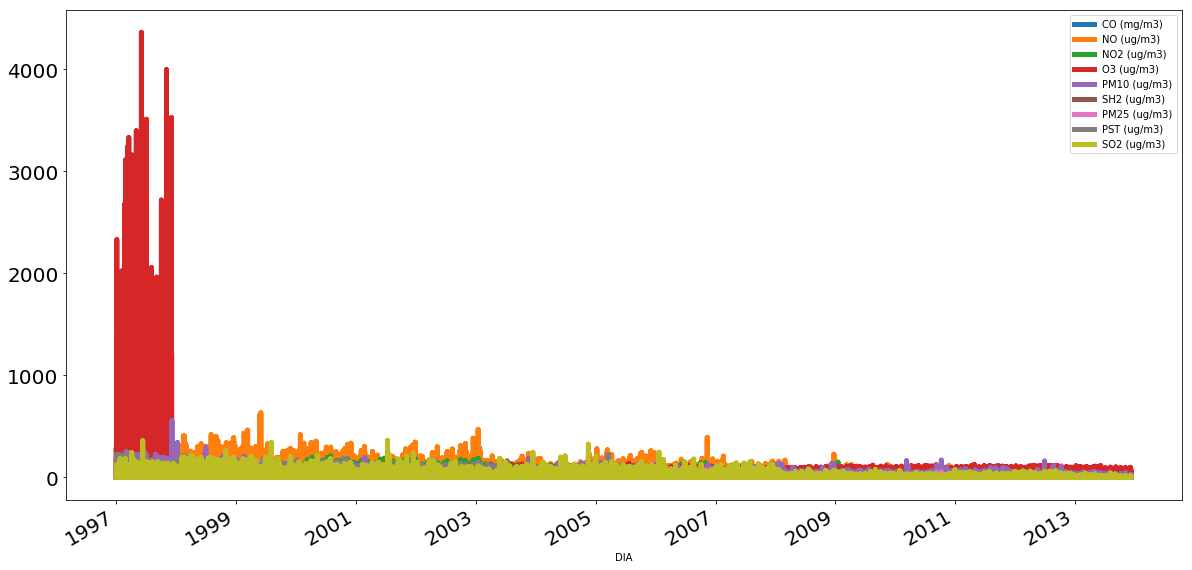

In [10]:
#Preparamos los gases para ver su comportamiento a lo largo de tiempo, se puede observar que 
#estos gases tienen un comportamiento no estacional y han descendido a lo largo de tiempo
for i in gas_headers:
    st[i] = st[i].replace("No cumple el anexo IV de la Decisión del Consejo 97/101/CE",0)
    st[i] = st[i].fillna(0)
    st[i] = st[i].astype(float)
    #st[i] = st[~st[i].isin(["No cumple el anexo IV de la Decisión del Consejo 97/101/CE"])]
    #st = st[(st[i] != "No cumple el anexo IV de la Decisión del Consejo 97/101/CE")]
    #stt.append(st[~st[i].isin(["No cumple el anexo IV de la Decisión del Consejo 97/101/CE"])])
    #st = st.drop("No cumple el anexo IV de la Decisión del Consejo 97/101/CE")
    #df = df[~df['your column'].isin(['list of strings'])]

st.plot(figsize=(20,10), linewidth=5, fontsize=20)

In [11]:
for i in gas_headers:
    gas = pd.Categorical(st[i])
    print(gas.describe())

            counts     freqs
categories                  
0.0          77427  0.505662
0.1           3921  0.025607
0.2           3788  0.024739
0.3           4018  0.026241
0.4           5201  0.033967
0.5           5359  0.034999
0.6           5801  0.037885
0.7           5763  0.037637
0.8           5433  0.035482
0.9           4872  0.031818
1.0           4297  0.028063
1.1           3838  0.025065
1.2           3348  0.021865
1.3           2984  0.019488
1.4           2346  0.015321
1.5           2151  0.014048
1.6           1689  0.011031
1.7           1443  0.009424
1.8           1199  0.007830
1.9           1093  0.007138
2.0            906  0.005917
2.1            747  0.004879
2.2            679  0.004434
2.3            588  0.003840
2.4            506  0.003305
2.5            388  0.002534
2.6            376  0.002456
2.7            317  0.002070
2.8            268  0.001750
2.9            224  0.001463
...            ...       ...
7.0              7  0.000046
7.1           

In [12]:
#st.dropna(subset=['NO2 (ug/m3)'], inplace = True)

In [13]:
gas = pd.Categorical(st['NO2 (ug/m3)'])
print(gas.describe())

            counts     freqs
categories                  
0.0           6865  0.044834
1.0           1569  0.010247
2.0           1958  0.012787
3.0           1532  0.010005
4.0           1690  0.011037
5.0           1760  0.011494
6.0           1979  0.012925
7.0           2247  0.014675
8.0           2383  0.015563
9.0           2563  0.016739
10.0          2649  0.017300
11.0          2807  0.018332
12.0          2880  0.018809
13.0          2937  0.019181
14.0          3114  0.020337
15.0          3065  0.020017
16.0          3116  0.020350
17.0          3093  0.020200
18.0          3134  0.020468
19.0          3157  0.020618
20.0          3084  0.020141
21.0          3066  0.020024
22.0          3018  0.019710
23.0          3119  0.020370
24.0          3163  0.020657
25.0          3059  0.019978
26.0          2989  0.019521
27.0          3010  0.019658
28.0          2994  0.019553
29.0          2844  0.018574
...            ...       ...
174.0            2  0.000013
175.0         

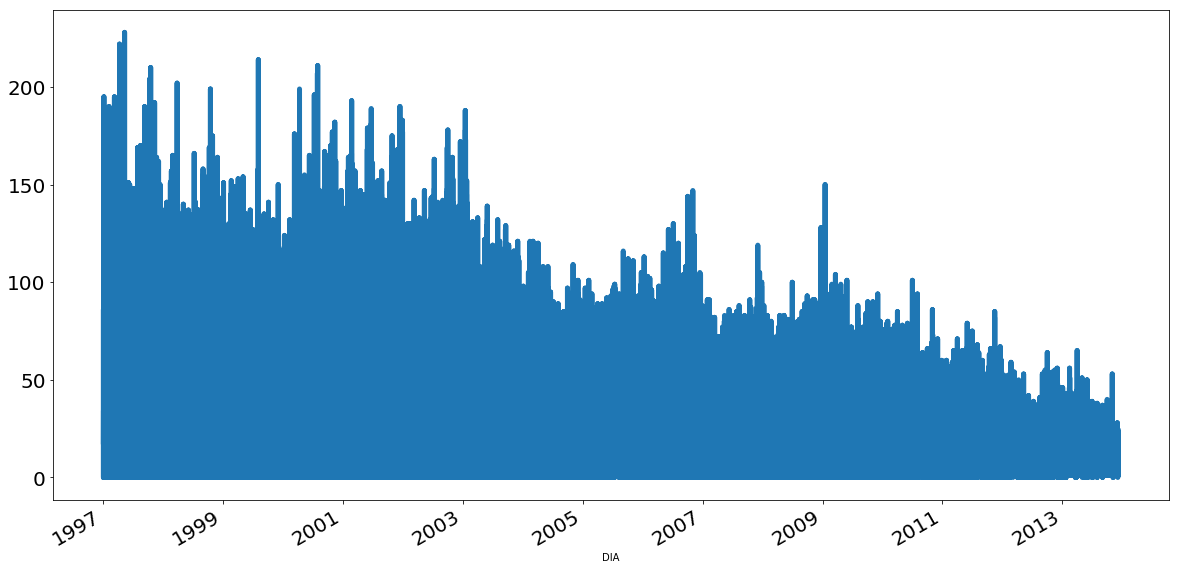

In [14]:
st['NO2 (ug/m3)'].plot(figsize=(20,10), linewidth=5, fontsize=20)

In [15]:
#Aplicamos un smooth a los datos por año
tsd = st['NO2 (ug/m3)'].groupby(pd.Grouper(freq='M')).agg('mean')

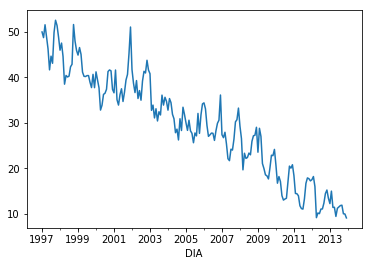

In [16]:
tsd.plot()

In [17]:
#Usaremos ARIMA porque el valor esta mas cercano al 0 y confirmar la correlacion
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
sm.stats.durbin_watson(tsd)

0.007942952479232275

In [18]:
st.describe()

,CO (mg/m3),NO (ug/m3),NO2 (ug/m3),O3 (ug/m3),PM10 (ug/m3),SH2 (ug/m3),PM25 (ug/m3),PST (ug/m3),SO2 (ug/m3)
count,153120.000000,153120.000000,153120.000000,153120.000000,153120.000000,153120.000000,153120.000000,153120.000000,153120.000000
mean,0.497736,22.782386,30.812317,41.042437,25.737539,0.454872,2.138506,5.576803,12.204852
std,0.764962,29.843699,23.007266,51.970217,23.688521,2.087823,10.539075,18.895341,15.491794
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5.000000,14.000000,17.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,0.000000,13.000000,27.000000,42.000000,23.000000,0.000000,0.000000,0.000000,8.000000
75%,0.800000,29.000000,42.000000,61.000000,38.000000,0.000000,0.000000,0.000000,15.000000
max,25.100000,634.000000,228.000000,4364.000000,557.000000,63.000000,216.000000,234.000000,364.000000


In [19]:
#Obtenemos las provincias y estaciones para plotear cada estacion, existen estaciones con el nombre incorrecto, asi que primero corregimos
zonas = pd.Categorical(st['PROVINCIA']+';'+st['ESTACIÓN'])
zonas_unicos = zonas.categories.unique()
print(zonas_unicos)

Index([u'BURGOS;Aranda de Duero', u'BURGOS;Aranda de Duero 2',
       u'BURGOS;Burgos 1', u'BURGOS;Burgos 2', u'BURGOS;Burgos 3',
       u'BURGOS;Burgos 4', u'BURGOS;Burgos 5', u'BURGOS;Burgos1',
       u'BURGOS;Burgos4', u'BURGOS;Burgos5', u'BURGOS;Medina de Pomar',
       u'BURGOS;Miranda de Ebro 1', u'BURGOS;Miranda de Ebro 2',
       u'BURGOS;Miranda de Ebro 3', u'BURGOS;Miranda de Ebro1',
       u'BURGOS;Miranda de Ebro2', u'LEÓN;La Robla', u'LEÓN;Lario',
       u'LEÓN;Leon 4', u'LEÓN;Leon3', u'LEÓN;Le�n 1', u'LEÓN;Le�n 2',
       u'LEÓN;Le�n 3', u'LEÓN;Le�n 4', u'LEÓN;Le�n1', u'LEÓN;Ponferrada 1',
       u'LEÓN;Ponferrada 2', u'LEÓN;Ponferrada 3', u'LEÓN;Ponferrada 4',
       u'LEÓN;Ponferrada 5', u'LEÓN;Ponferrada4', u'PALENCIA;Guardo',
       u'PALENCIA;Palencia 1', u'PALENCIA;Palencia 2', u'PALENCIA;Palencia 3',
       u'PALENCIA;Velilla del R�o Carri�n', u'PALENCIA;Venta de Ba�os',
       u'SALAMANCA;El Maillo', u'SALAMANCA;Salamanca 1',
       u'SALAMANCA;Salamanca 2', u'SAL

In [20]:
st['ESTACIÓN'] = st['ESTACIÓN'].replace('Burgos1','Burgos 1')
st['ESTACIÓN'] = st['ESTACIÓN'].replace('Burgos4','Burgos 4')
st['ESTACIÓN'] = st['ESTACIÓN'].replace('Burgos5','Burgos 5')

st['ESTACIÓN'] = st['ESTACIÓN'].replace('Miranda de Ebro1','Miranda de Ebro 1')
st['ESTACIÓN'] = st['ESTACIÓN'].replace('Miranda de Ebro2','Miranda de Ebro 2')

st['ESTACIÓN'] = st['ESTACIÓN'].replace('Le�n1','Le�n 1')
st['ESTACIÓN'] = st['ESTACIÓN'].replace('Leon3','Le�n 3')
st['ESTACIÓN'] = st['ESTACIÓN'].replace('Leon 4','Le�n 4')

st['ESTACIÓN'] = st['ESTACIÓN'].replace('Ponferrada4','Ponferrada 4')

st['ESTACIÓN'] = st['ESTACIÓN'].replace('Salamanca4','Salamanca 4')
st['ESTACIÓN'] = st['ESTACIÓN'].replace('Salamanca5','Salamanca 5')
st['ESTACIÓN'] = st['ESTACIÓN'].replace('Salamanca6','Salamanca 6')

In [21]:
#Obtenemos las provincias y estaciones para plotear cada estacion, existen estaciones con el nombre incorrecto, asi que primero corregimos
zonas = pd.Categorical(st['PROVINCIA']+';'+st['ESTACIÓN'])
zonas_unicos = zonas.categories.unique()
print(zonas_unicos)

Index([u'BURGOS;Aranda de Duero', u'BURGOS;Aranda de Duero 2',
       u'BURGOS;Burgos 1', u'BURGOS;Burgos 2', u'BURGOS;Burgos 3',
       u'BURGOS;Burgos 4', u'BURGOS;Burgos 5', u'BURGOS;Medina de Pomar',
       u'BURGOS;Miranda de Ebro 1', u'BURGOS;Miranda de Ebro 2',
       u'BURGOS;Miranda de Ebro 3', u'LEÓN;La Robla', u'LEÓN;Lario',
       u'LEÓN;Le�n 1', u'LEÓN;Le�n 2', u'LEÓN;Le�n 3', u'LEÓN;Le�n 4',
       u'LEÓN;Ponferrada 1', u'LEÓN;Ponferrada 2', u'LEÓN;Ponferrada 3',
       u'LEÓN;Ponferrada 4', u'LEÓN;Ponferrada 5', u'PALENCIA;Guardo',
       u'PALENCIA;Palencia 1', u'PALENCIA;Palencia 2', u'PALENCIA;Palencia 3',
       u'PALENCIA;Velilla del R�o Carri�n', u'PALENCIA;Venta de Ba�os',
       u'SALAMANCA;El Maillo', u'SALAMANCA;Salamanca 1',
       u'SALAMANCA;Salamanca 2', u'SALAMANCA;Salamanca 3',
       u'SALAMANCA;Salamanca 4', u'SALAMANCA;Salamanca 5',
       u'SALAMANCA;Salamanca 6', u'SEGOVIA;Segovia 1', u'SEGOVIA;Segovia 2',
       u'SORIA;Muriel de la Fuente', u'SORIA

0.007942952479232275


/home/david/anaconda2/lib/python2.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/home/david/anaconda2/lib/python2.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/home/david/anaconda2/lib/python2.7/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be i

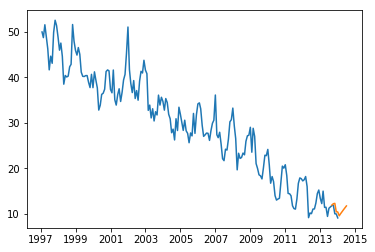

None


In [22]:
tsd = st['NO2 (ug/m3)'].groupby(pd.Grouper(freq='M')).agg('mean')
print(sm.stats.durbin_watson(tsd))
model = ARIMA(tsd, order=(1,0,0))
model_fit = model.fit()
pred = model_fit.predict(start=tsd.shape[0]-5, end=tsd.shape[0]+5)
plt.plot(tsd)
plt.plot(pred)
print(plt.show())

BURGOS - Aranda de Duero
DIA
1997-01-31    38.096774
1997-02-28    45.892857
1997-03-31    41.709677
1997-04-30    42.448276
1997-05-31    38.967742
1997-06-30    39.733333
1997-07-31    31.935484
1997-08-31    39.709677
1997-09-30    36.600000
1997-10-31    45.548387
1997-11-30    49.300000
1997-12-31    40.806452
1998-01-31    42.903226
1998-02-28    49.142857
1998-03-31    40.161290
1998-04-30    41.300000
1998-05-31    40.419355
1998-06-30    44.033333
1998-07-31    48.709677
1998-08-31    40.806452
1998-09-30    37.133333
1998-10-31    51.870968
1998-11-30    46.400000
1998-12-31    42.645161
1999-01-31    47.100000
1999-02-28    39.464286
1999-03-31    39.129032
1999-04-30    33.833333
1999-05-31    40.193548
1999-06-30    35.166667
                ...    
2006-07-31    32.096774
2006-08-31    35.193548
2006-09-30    33.233333
2006-10-31    31.129032
2006-11-30    31.766667
2006-12-31    39.000000
2007-01-31    35.483871
2007-02-28    31.214286
2007-03-31    37.225806
2007-04-30 

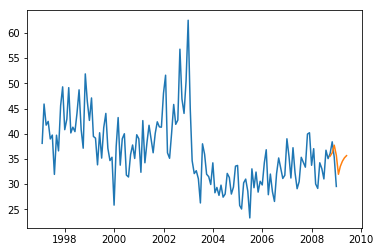

None
BURGOS - Aranda de Duero 2
DIA
2010-01-31    23.466667
2010-02-28    17.538462
2010-03-31     8.566667
2010-04-30    14.000000
2010-05-31    16.233333
2010-06-30    15.448276
2010-07-31    16.233333
2010-08-31    18.200000
2010-09-30    21.482759
2010-10-31    28.200000
2010-11-30    24.586207
2010-12-31    22.483871
2011-01-31    25.064516
2011-02-28    22.178571
2011-03-31    22.129032
2011-04-30    18.166667
2011-05-31    14.903226
2011-06-30    14.333333
2011-07-31    15.258065
2011-08-31    16.064516
2011-09-30    17.900000
2011-10-31    20.129032
2011-11-30    20.133333
2011-12-31    21.677419
2012-01-31    22.645161
2012-02-29    20.862069
2012-03-31    17.354839
2012-04-30    13.533333
2012-05-31    12.064516
2012-06-30     9.966667
2012-07-31    12.483871
2012-08-31    14.709677
2012-09-30    16.333333
2012-10-31    19.258065
2012-11-30    19.827586
2012-12-31    16.354839
2013-01-31    17.040000
2013-02-28    18.181818
2013-03-31    15.840000
2013-04-30    14.041667
2013

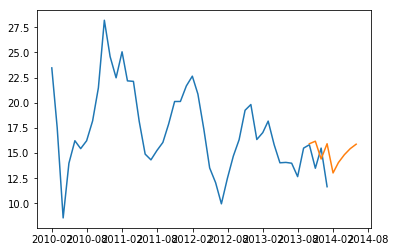

None
BURGOS - Burgos 1
DIA
1997-01-31    58.258065
1997-02-28    56.071429
1997-03-31    59.451613
1997-04-30    60.466667
1997-05-31    58.580645
1997-06-30    47.300000
1997-07-31    54.709677
1997-08-31    47.032258
1997-09-30    61.933333
1997-10-31    59.483871
1997-11-30    54.366667
1997-12-31    53.741935
1998-01-31    53.516129
1998-02-28    57.333333
1998-03-31    52.200000
1998-04-30    46.275862
1998-05-31    54.566667
1998-06-30    53.620690
1998-07-31    47.677419
1998-08-31    47.838710
1998-09-30    54.966667
1998-10-31    59.000000
1998-11-30    56.300000
1998-12-31    57.903226
1999-01-31    54.866667
1999-02-28    52.464286
1999-03-31    54.129032
1999-04-30    47.689655
1999-05-31    47.142857
1999-06-30    48.966667
                ...    
2011-07-31          NaN
2011-08-31          NaN
2011-09-30          NaN
2011-10-31          NaN
2011-11-30          NaN
2011-12-31          NaN
2012-01-31    15.000000
2012-02-29    16.875000
2012-03-31    18.625000
2012-04-30   

LinAlgError: Array must not contain infs or NaNs

In [23]:
for i in zonas_unicos:
    x = i.split(';')
    print(x[0]+" - "+x[1])
    
    dtt = st[(st['PROVINCIA'] == x[0]) & (st['ESTACIÓN'] == x[1])]

    
    dtt.to_csv(i+'.csv')
    tsd = dtt['NO2 (ug/m3)'].groupby(pd.Grouper(freq='M')).agg('mean')
    
    print(tsd)
    
    print(sm.stats.durbin_watson(tsd))
    model = ARIMA(tsd, order=(1,0,0))
    model_fit = model.fit()
    pred = model_fit.predict(start=tsd.shape[0]-4, end=tsd.shape[0]+4)
    
    plt.plot(tsd)
    plt.plot(pred)
    print(plt.show())